In [51]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0,8.0)

In [52]:
np.random.seed(3)
X,y = sklearn.datasets.make_moons(200,noise=0.20)

In [53]:
X.shape, y.shape

((200, 2), (200,))

In [54]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1], dtype=int64)

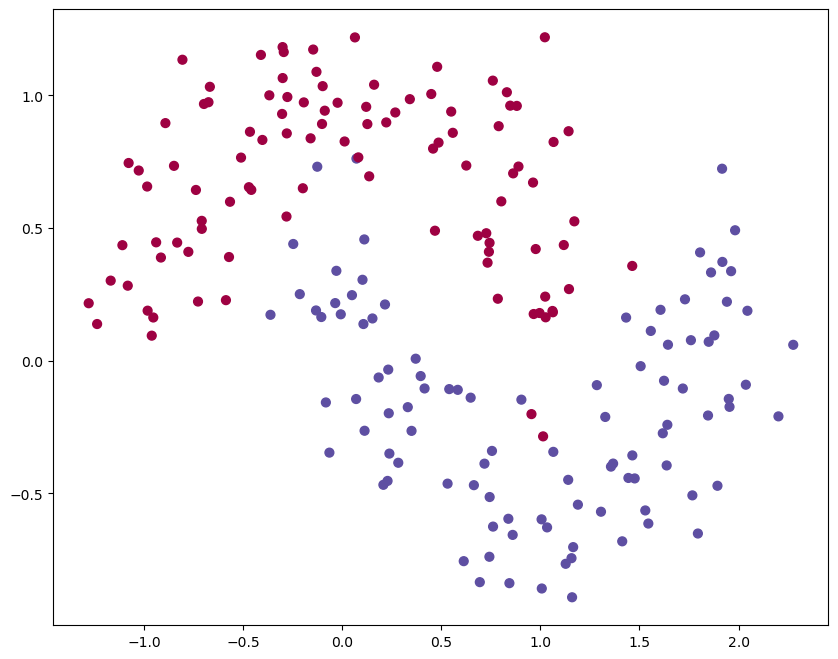

In [55]:
plt.scatter(X[:,0],X[:,1], s=40, c=y,cmap=plt.cm.Spectral)
plt.show()

In [56]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X,y)

LogisticRegressionCV()

In [57]:
# helper function to plot a decision boundary
def plot_decision_boundary(pred_func):
    x_min,x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min,y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    h = 0.01
    # generate grid of points with distance h between them
    xx, yy =np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min, y_max,h))
    # predict the function value for whole grid
    z = pred_func(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    plt.contourf(xx,yy,z,cmap=plt.cm.Spectral)
    plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

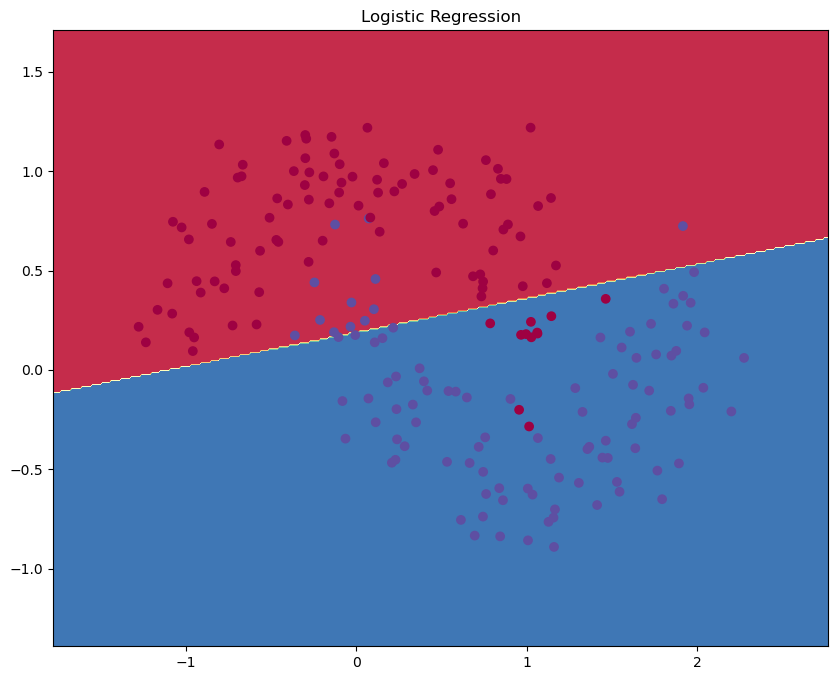

In [58]:
# plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

In [59]:
# implement the nn 

num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [60]:
num_examples

200

In [61]:
# sigmoid activation function
def sigmoid(z):
    return (1 / (1+np.exp(-z)))

# reLU activation function
def relu(z):
    return np.max(0,z)

In [62]:
# helper function to evaluate the local loss on the dataset
def calculate_loss(model):
    W1, b1,W2,b2 = model['W1'], model['b1'],model['W2'],model['b2']
    
    # forward propagation to calculate our predictions
    z1 = X.dot(W1)+b1
    a1 = np.tanh(z1) # tanh is activation function
    z2 = a1.dot(W2)+b2
    
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # calculating the loss
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)
    # add regularization term to the loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1))+ np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [63]:
# helper function to predict an output (0 or 1)

def predict(model, x):
    W1, b1,W2,b2 = model['W1'],model['b1'],model['W2'],model['b2']
    # forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) +b2
    exp_scores =np.exp(z2)
    probs =exp_scores/np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)



In [64]:
#This function learns parameters for the neural network and returns the model.
# nn_dim: Number of nodes in the hidden layer
# num_passes: Number of passed through the training data for gradient descent
# print_loss: If True, print the loss every 1000 iterations

def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # initialize the parameters to random values. we need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim,nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1,nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim)/ np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    
    # this is what we return at the end
    model ={}
    
    # Gradient descent. for each batch..
    for i in range(0, num_passes):
        
        # forward propagation
        z1 =X.dot(W1)+ b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        
        # back propagation
        delta3 =probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T)* (1-np.power(a1, 2))
        dW1 = np.dot(X.T,delta2)
        db1 = np.sum(delta2, axis=0)
        
        # add regularization terms (b1 and b2 dont have regularization terms)
        
        dW2 += reg_lambda* W2
        dW1 += reg_lambda * W1
        
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to model
        model = {'W1':W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # optionally print the loss
        
        if print_loss and i % 1000==0:
            print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
            
    return model

#### A network with a hidden layer of size 3


Loss after iteration 0: 0.418627
Loss after iteration 1000: 0.046520
Loss after iteration 2000: 0.043340
Loss after iteration 3000: 0.041303
Loss after iteration 4000: 0.039900
Loss after iteration 5000: 0.038971
Loss after iteration 6000: 0.038373
Loss after iteration 7000: 0.037989
Loss after iteration 8000: 0.037739
Loss after iteration 9000: 0.037574
Loss after iteration 10000: 0.037463
Loss after iteration 11000: 0.037387
Loss after iteration 12000: 0.037334
Loss after iteration 13000: 0.037296
Loss after iteration 14000: 0.037269
Loss after iteration 15000: 0.037250
Loss after iteration 16000: 0.037236
Loss after iteration 17000: 0.037225
Loss after iteration 18000: 0.037218
Loss after iteration 19000: 0.037212


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

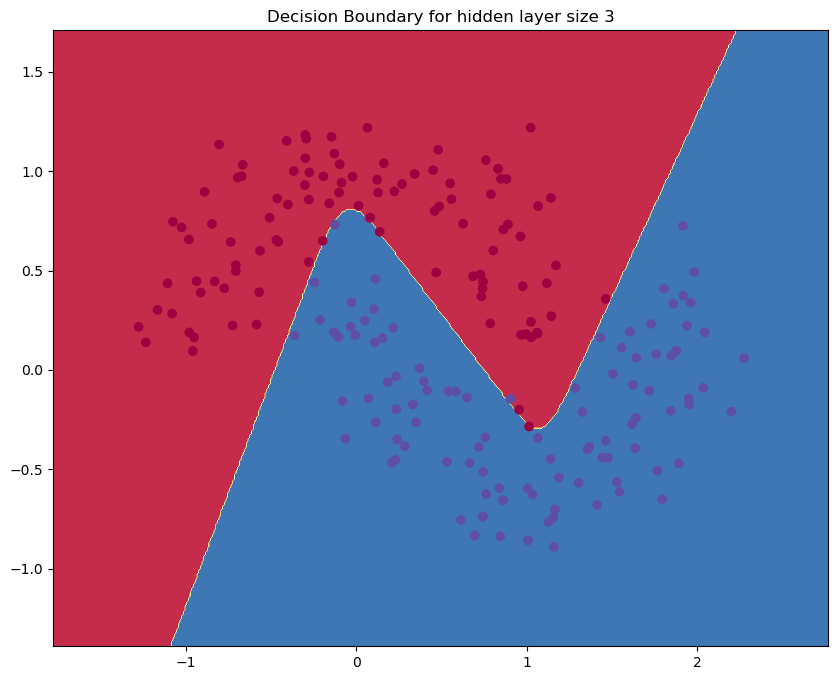

In [65]:
# Build a model with 3-dimensional hidden layer

model = build_model(3, print_loss=True)

plot_decision_boundary(lambda x: predict(model, x))

plt.title("Decision Boundary for hidden layer size 3")

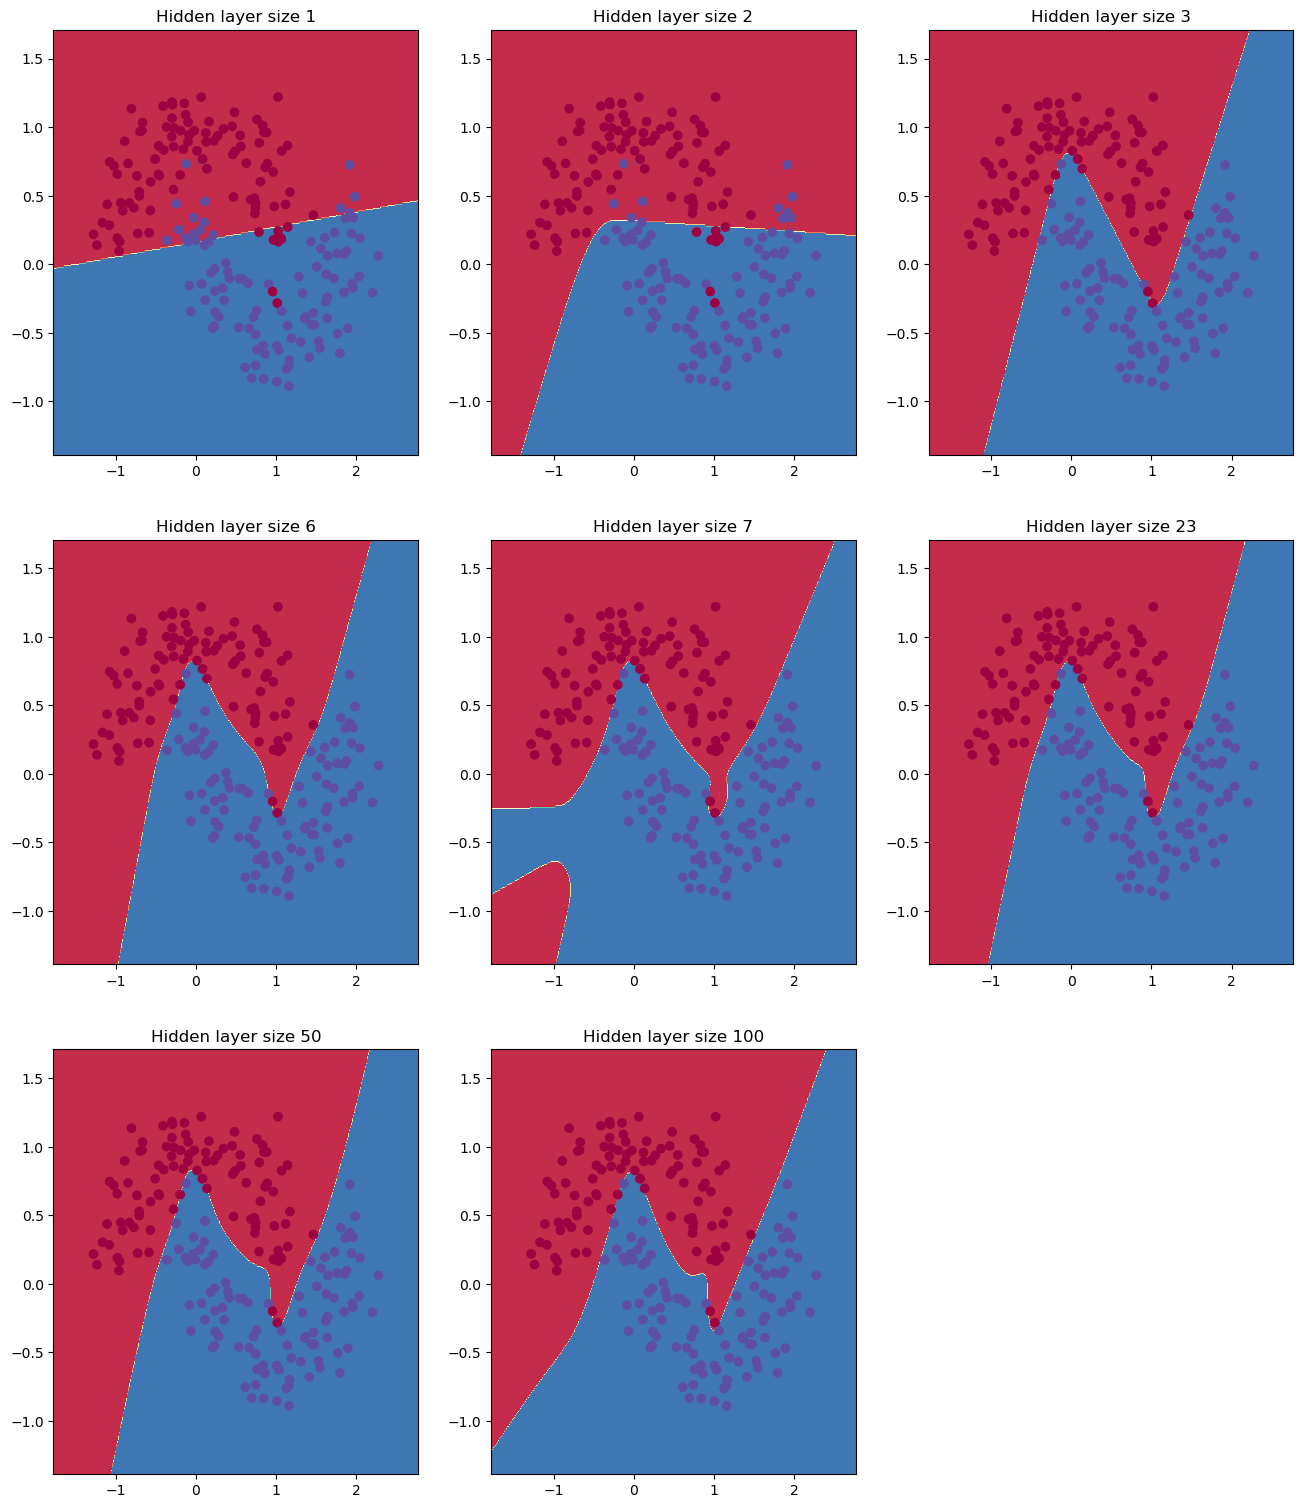

In [66]:
# Varying the hidden layer size

plt.figure(figsize=(16,32))
hidden_layer_dimensions = [1,2,3,6,7,23,50,100]

for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5,3, i+1)
    plt.title('Hidden layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x:predict(model,x))
plt.show()